In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

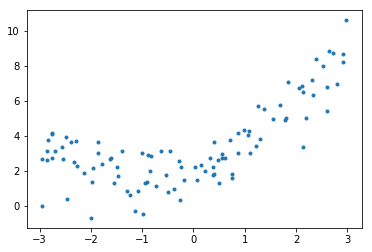

In [6]:
plt.plot(X,y,'.')
plt.show()

#### Ploynomial Regression using Scikit-learn

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)

In [9]:
X[0]

array([2.20265021])

In [11]:
X_poly[0] # converted 1D data into 2D data (x,x**2)

array([2.20265021, 4.85166796])

In [13]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lin_reg.intercept_, lin_reg.coef_

(array([2.12563057]), array([[0.94504204, 0.45486943]]))

#### Plot Learning Curves

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.legend()

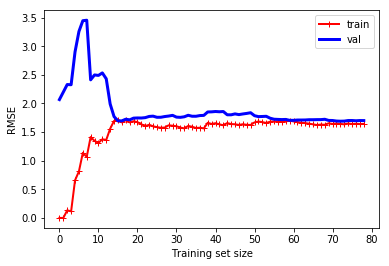

In [31]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

#### Learning curve for $10^{th}$ degree polynomial

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
polynomial_regression = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',LinearRegression())
])

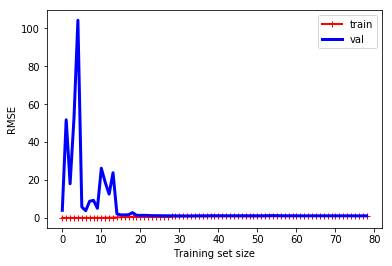

In [34]:
plot_learning_curves(polynomial_regression, X, y)